## Kepler Data
We are going planet hunting:

The data presented here are cleaned and are derived from observations made by the NASA Kepler space telescope. The Mission is ongoing
LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.
FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.
data is from https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data

In [1]:
import pandas as pd
import numpy as np
import scipy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('exoTrain.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [5]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


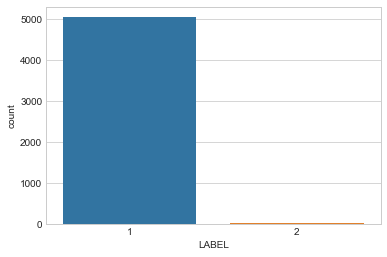

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='LABEL',data=train)

Count Plot illustrates imbalance in data set

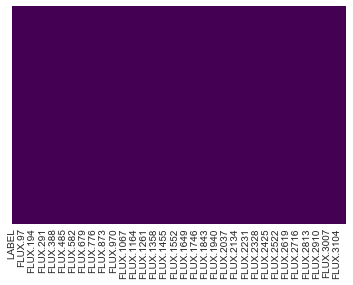

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Heat map was used to check for missing data

In [8]:
flux_noplanet=train[train['LABEL']==1].drop('LABEL', axis=1)
flux_noplanet.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,29.75,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,7.87,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,68.29,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97
40,-167.02,-137.65,-150.05,-136.85,-98.73,-103.14,-107.70,-123.19,-125.65,-119.86,...,-97.43,-79.79,-80.62,-78.22,-105.06,-69.67,-90.45,-73.67,-66.71,-66.07
41,207.74,223.60,246.15,224.06,210.77,189.56,172.68,170.31,148.79,181.26,...,-53.06,-136.92,-174.97,-180.46,-164.01,-126.58,84.05,63.81,108.36,78.10


In [9]:
time=np.linspace(0,1920,3197) #80 days*24 hours =1920 hours
time

array([  0.00000000e+00,   6.00750939e-01,   1.20150188e+00, ...,
         1.91879850e+03,   1.91939925e+03,   1.92000000e+03])

In [10]:
#converting input into frequency domain
def spectrum_converter(X):
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [11]:
flux_noplanet_fft=flux_noplanet.apply(spectrum_converter, axis =1)
flux_noplanet_fft.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,668.96,23090.495631,14484.194117,18787.759028,20510.035763,7764.656693,7863.713834,3908.859086,5590.765074,15519.474236,...,1178.615150,15519.474236,5590.765074,3908.859086,7863.713834,7764.656693,20510.035763,18787.759028,14484.194117,23090.495631
38,13466.62,33885.622887,30080.248754,19420.826175,25452.277589,20480.722429,10146.292341,9539.584020,9984.293933,6085.383455,...,2988.179454,6085.383455,9984.293933,9539.584020,10146.292341,20480.722429,25452.277589,19420.826175,30080.248754,33885.622887
39,2849.94,8056.539922,1831.461240,10463.208382,5836.971762,19641.220273,2151.275320,10417.350280,7773.374982,7267.667785,...,10862.365430,7267.667785,7773.374982,10417.350280,2151.275320,19641.220273,5836.971762,10463.208382,1831.461240,8056.539922
40,15507.60,2222.112237,9169.734440,18598.593109,3227.666475,7093.599141,7476.025715,6232.998346,2884.103288,4719.207387,...,5935.624850,4719.207387,2884.103288,6232.998346,7476.025715,7093.599141,3227.666475,18598.593109,9169.734440,2222.112237
41,106010.86,128999.617330,143742.008982,90092.034749,142256.656002,107056.161769,89888.254202,125985.432170,128979.944259,116455.609600,...,101384.334181,116455.609600,128979.944259,125985.432170,89888.254202,107056.161769,142256.656002,90092.034749,143742.008982,128999.617330


In [13]:
frequency=np.linspace(0,1.4787,3197)  # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
frequency.max()

1.4786999999999999

In [15]:
flux_planet=train[train['LABEL']==2].drop('LABEL', axis=1)
flux_planet.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [16]:
flux_planet_fft=flux_planet.apply(spectrum_converter, axis =1)
flux_planet_fft.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,31822.48,3542.697260,55671.612807,52952.701956,200751.502826,29353.124433,25093.521120,16709.544467,28812.723753,25559.772897,...,2992.545812,25559.772897,28812.723753,16709.544467,25093.521120,29353.124433,200751.502826,52952.701956,55671.612807,3542.697260
1,23747.10,18904.034831,23034.013754,23943.701671,13819.563577,20765.092016,17303.647198,7401.036438,8735.502062,8872.865012,...,7383.345790,8872.865012,8735.502062,7401.036438,17303.647198,20765.092016,13819.563577,23943.701671,23034.013754,18904.034831
2,26180.51,143610.487591,41912.294689,365999.616787,104066.520704,189543.713858,123398.774919,83153.412884,22577.194163,99916.175640,...,48754.521520,99916.175640,22577.194163,83153.412884,123398.774919,189543.713858,104066.520704,365999.616787,41912.294689,143610.487591
3,14855.14,12371.439885,33309.457851,69042.125217,64290.918441,172076.407434,49458.284691,45511.563319,35061.742616,21291.359595,...,17060.829321,21291.359595,35061.742616,45511.563319,49458.284691,172076.407434,64290.918441,69042.125217,33309.457851,12371.439885
4,45527.39,310414.084694,140433.251401,400661.916141,406211.307176,283810.829694,319055.791578,79144.154130,99624.063739,189609.298602,...,13455.026552,189609.298602,99624.063739,79144.154130,319055.791578,283810.829694,406211.307176,400661.916141,140433.251401,310414.084694


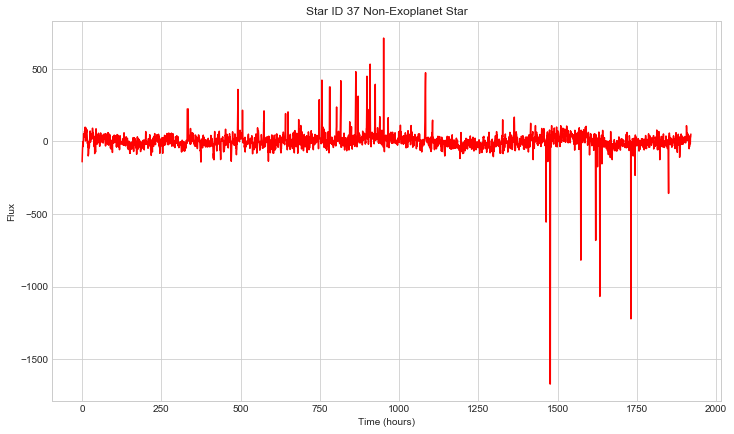

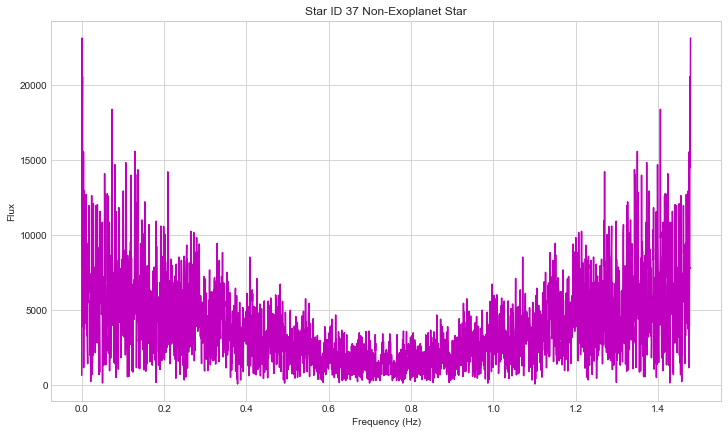

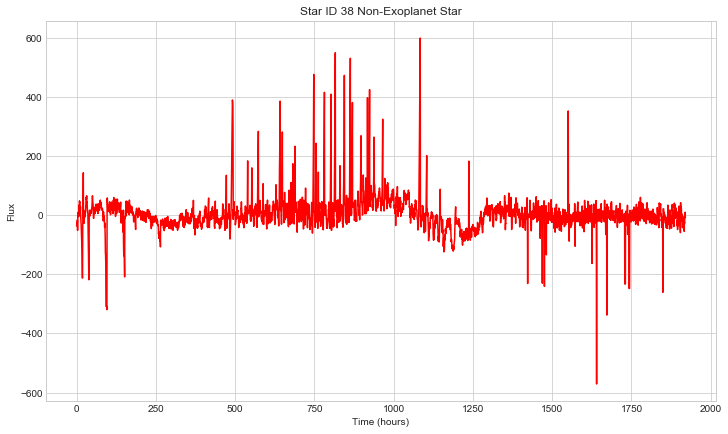

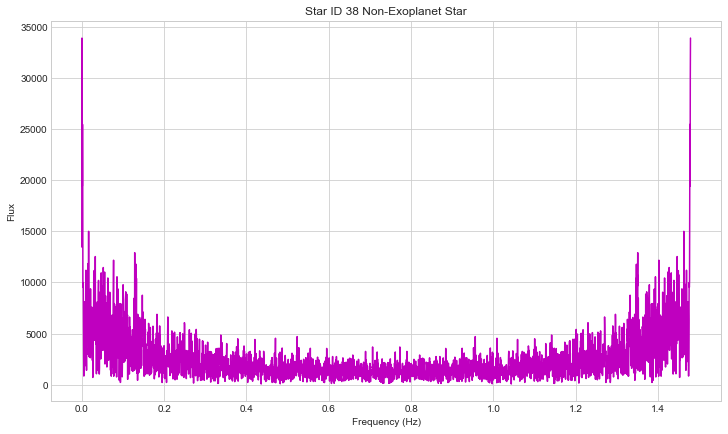

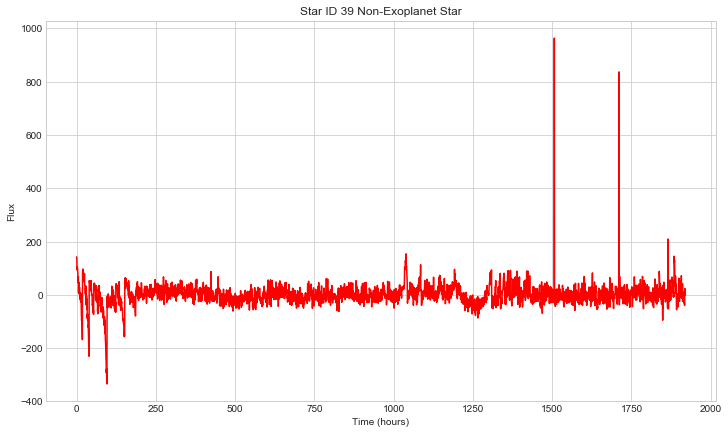

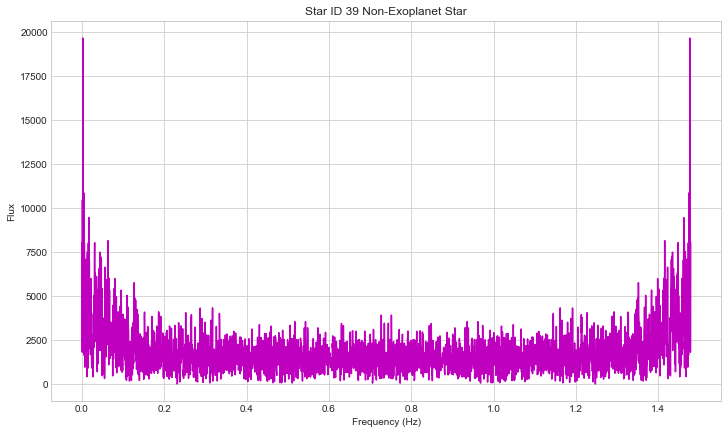

In [14]:
for i in range(3):
    plt.figure(figsize=(12,7))
    plt.plot(time,flux_noplanet.iloc[i],'r-')
    plt.xlabel('Time (hours)')
    plt.ylabel('Flux')
    plt.title('Star ID {} Non-Exoplanet Star'.format(i+37))

    plt.figure(figsize=(12,7))
    plt.plot(frequency,flux_noplanet_fft.iloc[i],'m-')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux')
    plt.title('Star ID {} Non-Exoplanet Star'.format(i+37))

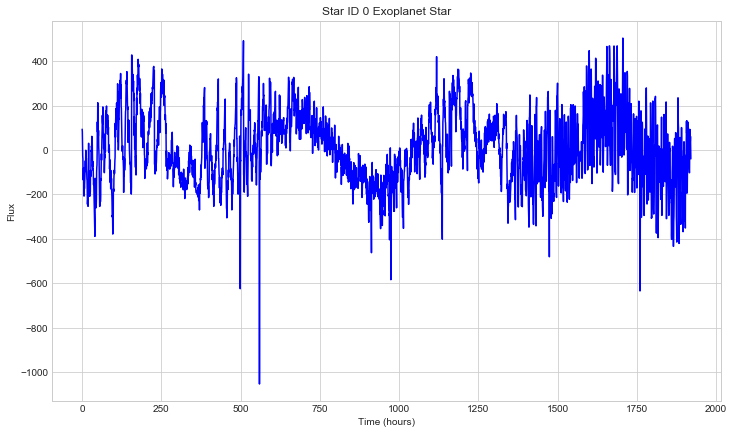

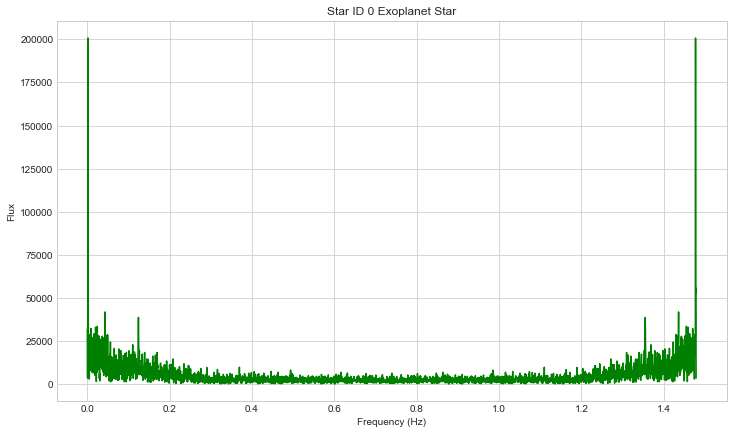

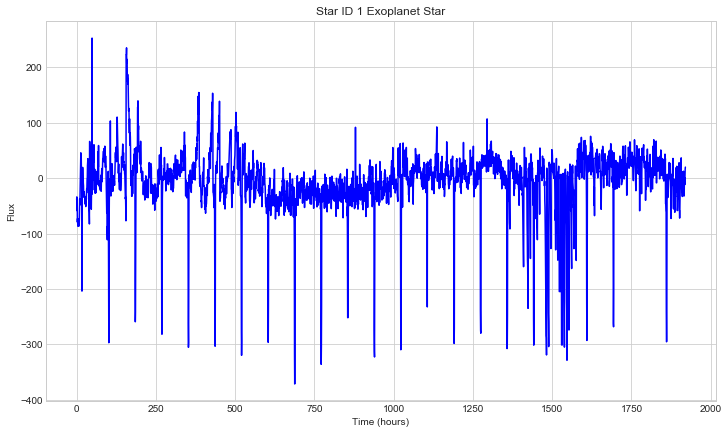

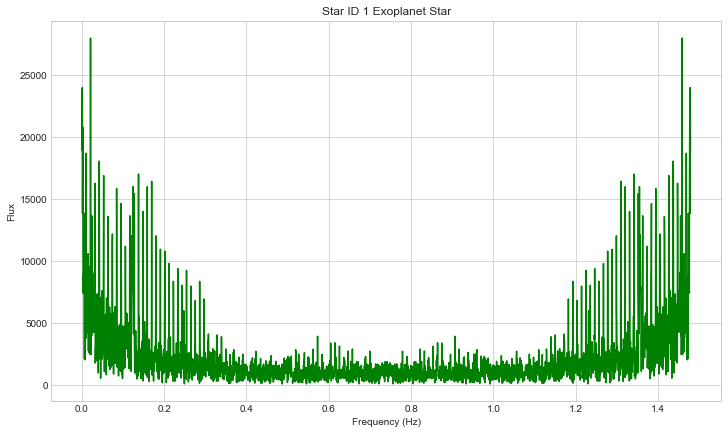

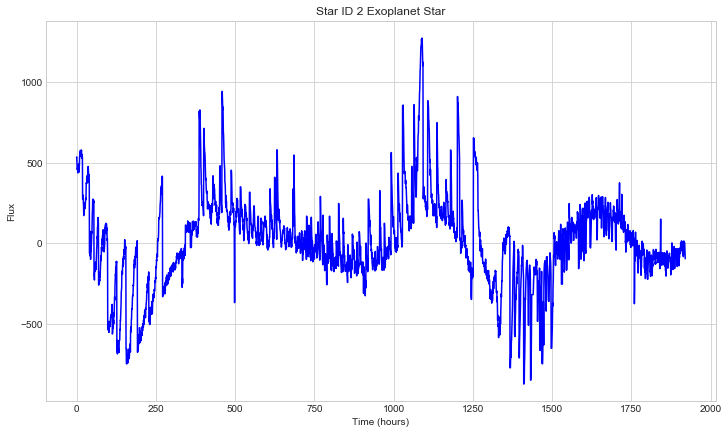

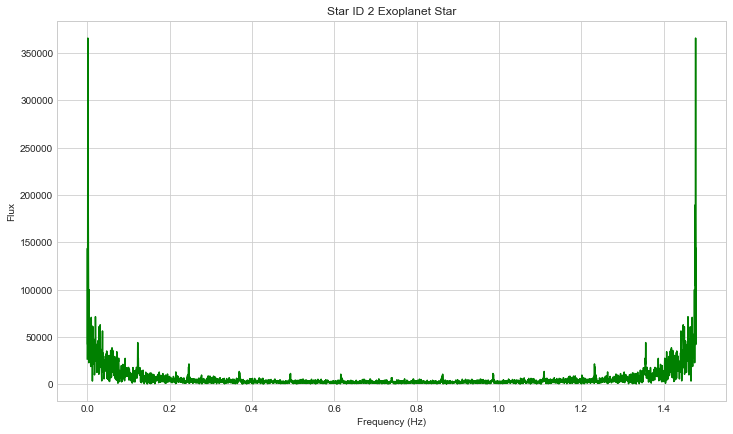

In [18]:
for i in range(3):
    plt.figure(figsize=(12,7))
    plt.plot(time,flux_planet.iloc[i],'b-')
    plt.xlabel('Time (hours)')
    plt.ylabel('Flux')
    plt.title('Star ID {} Exoplanet Star'.format(i))

    plt.figure(figsize=(12,7))
    plt.plot(frequency,flux_planet_fft.iloc[i],'g-')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux')
    plt.title('Star ID {} Exoplanet Star'.format(i))


In [21]:
train_fft=train.drop('LABEL',axis=1).apply(spectrum_converter, axis =1)
train_fft.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,31822.48,3542.697260,55671.612807,52952.701956,200751.502826,29353.124433,25093.521120,16709.544467,28812.723753,25559.772897,...,2992.545812,25559.772897,28812.723753,16709.544467,25093.521120,29353.124433,200751.502826,52952.701956,55671.612807,3542.697260
1,23747.10,18904.034831,23034.013754,23943.701671,13819.563577,20765.092016,17303.647198,7401.036438,8735.502062,8872.865012,...,7383.345790,8872.865012,8735.502062,7401.036438,17303.647198,20765.092016,13819.563577,23943.701671,23034.013754,18904.034831
2,26180.51,143610.487591,41912.294689,365999.616787,104066.520704,189543.713858,123398.774919,83153.412884,22577.194163,99916.175640,...,48754.521520,99916.175640,22577.194163,83153.412884,123398.774919,189543.713858,104066.520704,365999.616787,41912.294689,143610.487591
3,14855.14,12371.439885,33309.457851,69042.125217,64290.918441,172076.407434,49458.284691,45511.563319,35061.742616,21291.359595,...,17060.829321,21291.359595,35061.742616,45511.563319,49458.284691,172076.407434,64290.918441,69042.125217,33309.457851,12371.439885
4,45527.39,310414.084694,140433.251401,400661.916141,406211.307176,283810.829694,319055.791578,79144.154130,99624.063739,189609.298602,...,13455.026552,189609.298602,99624.063739,79144.154130,319055.791578,283810.829694,406211.307176,400661.916141,140433.251401,310414.084694
